In [24]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

df = pd.read_excel(r"C:\Users\Raiyana Reyaz\OneDrive\Desktop\data science assignments\Clustering\data.xlsx")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


# Data Preprocessing:

In [25]:
print("Missing values in each column:")
print(df.isnull().sum())

Missing values in each column:
ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64


In [26]:
# Capping Outliers (IQR Winsorization)

def cap_outliers_iqr(df):
    df_cap = df.copy()
    for col in df_cap.columns:
        Q1 = df_cap[col].quantile(0.25)
        Q3 = df_cap[col].quantile(0.75)
        IQR = Q3 - Q1
        
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        
        # Capping values
        df_cap[col] = np.where(df_cap[col] < lower, lower, df_cap[col])
        df_cap[col] = np.where(df_cap[col] > upper, upper, df_cap[col])
    
    return df_cap

print("\nCapping outliers using IQR...")
df = cap_outliers_iqr(df)



Capping outliers using IQR...


In [27]:
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1.0,28143.0,0.0,1.0,1.0,1.0,174.0,1.0,0.0,0.0,7000.0,0.0
1,2.0,19244.0,0.0,1.0,1.0,1.0,215.0,2.0,0.0,0.0,6968.0,0.0
2,3.0,41354.0,0.0,1.0,1.0,1.0,4123.0,4.0,0.0,0.0,7034.0,0.0
3,4.0,14776.0,0.0,1.0,1.0,1.0,500.0,1.0,0.0,0.0,6952.0,0.0
4,5.0,97752.0,0.0,4.0,1.0,1.0,43300.0,26.0,777.5,2.5,6935.0,1.0


In [28]:
# Scale Features

scaler = StandardScaler()
df[df.columns] = scaler.fit_transform(df[df.columns])

print("\nPreprocessing complete.")
print(df.head())
print(df.shape)


Preprocessing complete.
        ID#   Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
0 -1.735125 -0.607258         0.0  -0.769578        0.0        0.0   
1 -1.734263 -0.758947         0.0  -0.769578        0.0        0.0   
2 -1.733402 -0.382070         0.0  -0.769578        0.0        0.0   
3 -1.732540 -0.835106         0.0  -0.769578        0.0        0.0   
4 -1.731679  0.579265         0.0   1.409471        0.0        0.0   

   Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
0    -0.843091    -1.148854          -0.604313        -0.626143   
1    -0.840822    -1.039133          -0.604313        -0.626143   
2    -0.624581    -0.819689          -0.604313        -0.626143   
3    -0.825052    -1.148854          -0.604313        -0.626143   
4     1.543191     1.594189           2.034489         2.020176   

   Days_since_enroll    Award?  
0           1.395454 -0.766919  
1           1.379957 -0.766919  
2           1.411920 -0.766919  
3           1.37220

In [29]:
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
               ID#       Balance  Qual_miles     cc1_miles  cc2_miles  \
count  3999.000000  3.999000e+03      3999.0  3.999000e+03     3999.0   
mean      0.000000 -5.685763e-17         0.0  1.705729e-16        0.0   
std       1.000125  1.000125e+00         0.0  1.000125e+00        0.0   
min      -1.735125 -1.086971e+00         0.0 -7.695784e-01        0.0   
25%      -0.865331 -7.711597e-01         0.0 -7.695784e-01        0.0   
50%       0.001017 -3.523592e-01         0.0 -7.695784e-01        0.0   
75%       0.866503  4.881053e-01         0.0  6.831212e-01        0.0   
max       1.728543  2.377003e+00         0.0  2.135821e+00        0.0   

       cc3_miles   Bonus_miles   Bonus_trans  Flight_miles_12mo  \
count     3999.0  3.999000e+03  3.999000e+03       3.999000e+03   
mean         0.0 -2.842882e-17  2.842882e-17      -7.107204e-18   
std          0.0  1.000125e+00  1.000125e+00       1.000125e+00   
min          0.0 -8.527184e-01 -1.258576e+00      -6.

<Figure size 1500x1000 with 0 Axes>

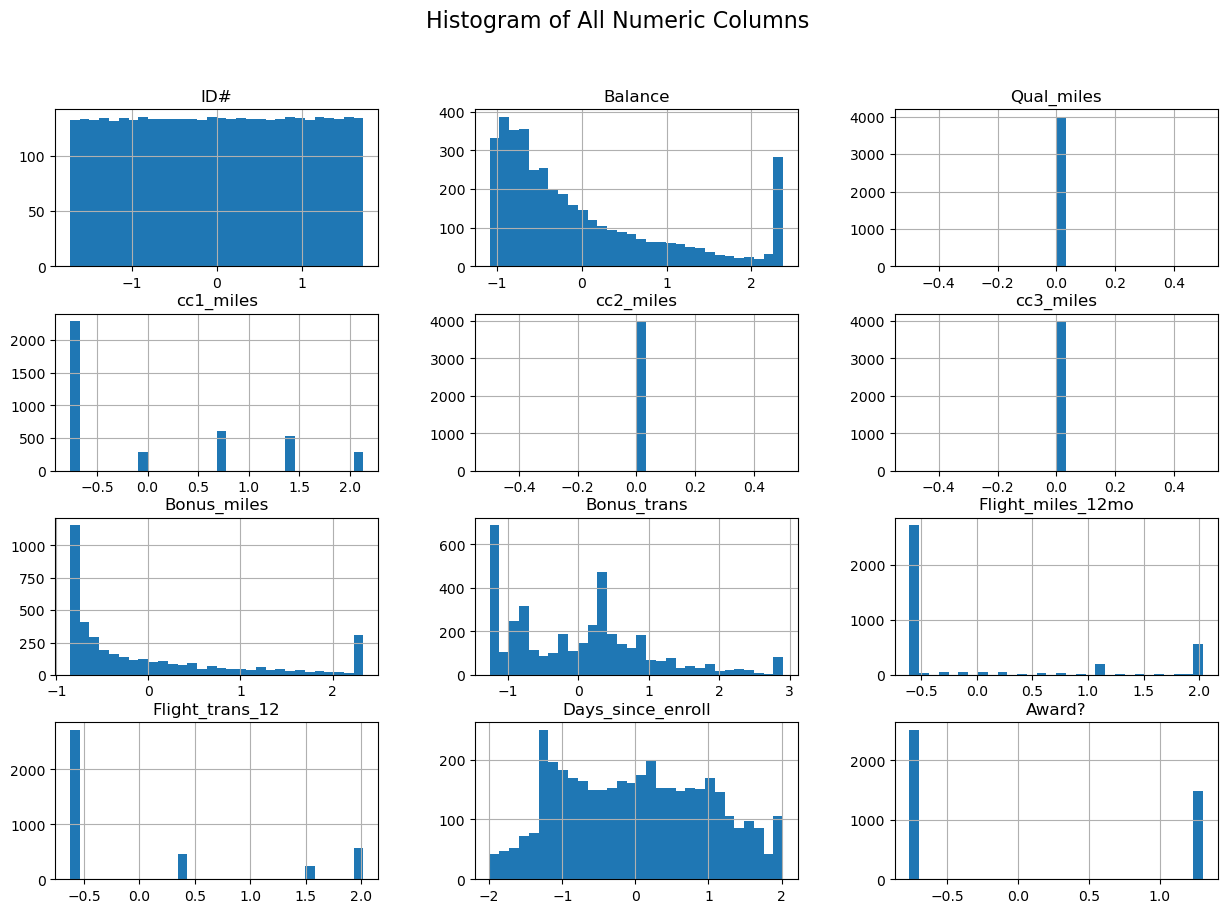

In [30]:
# Plot Distributions
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))
df.hist(bins=30, figsize=(15,10))
plt.suptitle("Histogram of All Numeric Columns", fontsize=16)
plt.show()


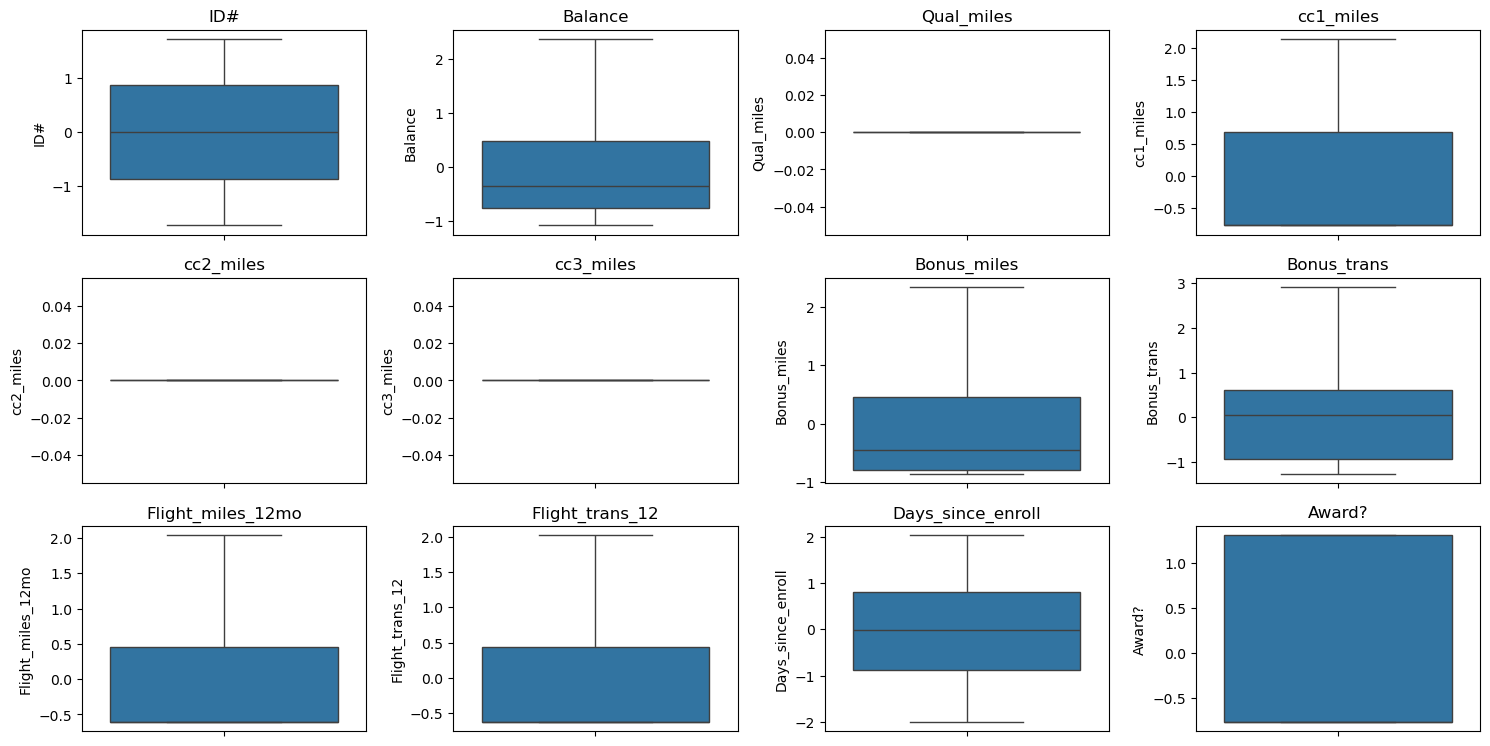

In [31]:
# Boxplots 
plt.figure(figsize=(15, 10))
for i, col in enumerate(df.columns, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

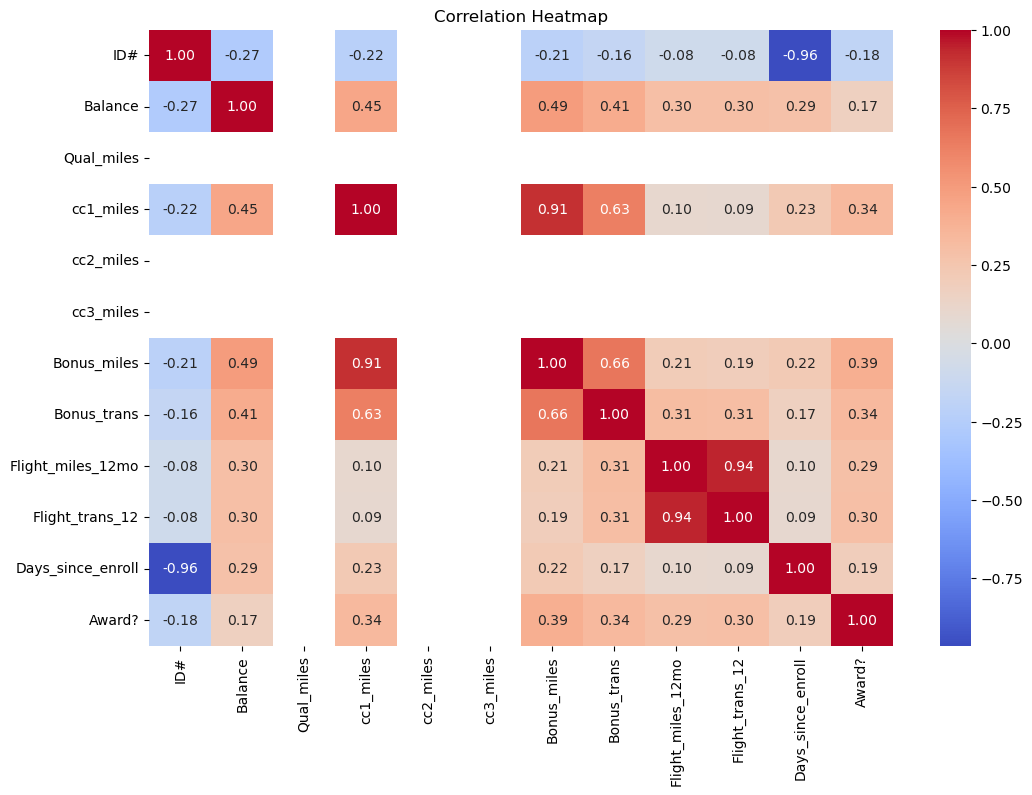

In [32]:
# Correlation Heatmap

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Implementing Clustering Algorithms:

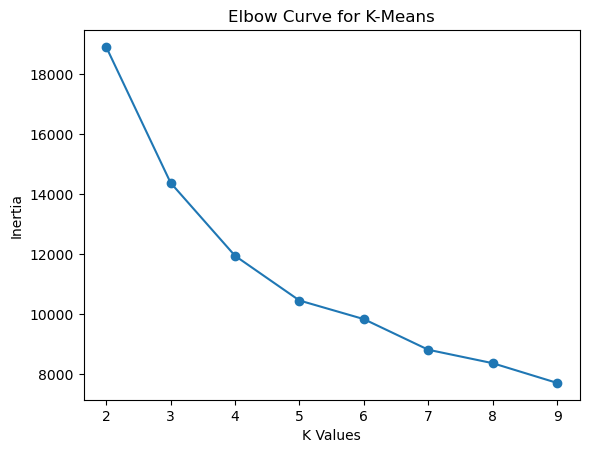

In [33]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score

X = df.drop(['ID#', 'Award?'], axis=1)
y = df['Award?']

X_scaled = X.values

# Elbow Method
# ----------------------------
inertia_list = []
K_range = range(2, 10)

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia_list.append(km.inertia_)

plt.plot(K_range, inertia_list, marker='o')
plt.xlabel("K Values")
plt.ylabel("Inertia")
plt.title("Elbow Curve for K-Means")
plt.show()

In [35]:
# ---- Fit K-Means using optimal K ----

best_k = 5 
kmeans = KMeans(n_clusters=best_k, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

df["KMeans_Cluster"] = kmeans_labels

# ---- Silhouette Score ----
kmeans_sil = silhouette_score(df, kmeans_labels)
print("K-Means Silhouette Score:", kmeans_sil)

score =kmeans_sil
if score >= 0.7:
    print("Silhouette Score:", score, "→ Excellent clustering quality.")
elif score >= 0.5:
    print("Silhouette Score:", score, "→ Good clustering quality.")
elif score >= 0.25:
    print("Silhouette Score:", score, "→ Weak/Poor clustering quality.")
else:
    print("Silhouette Score:", score, "→ Very poor clustering quality.")

K-Means Silhouette Score: 0.3137629039012701
Silhouette Score: 0.3137629039012701 → Weak/Poor clustering quality.


In [42]:
cluster_counts = df['KMeans_Cluster'].value_counts().sort_index()
print("\nCluster Counts:")
print(cluster_counts)



Cluster Counts:
KMeans_Cluster
0     608
1    1161
2     915
3     381
4     934
Name: count, dtype: int64


In [43]:
cluster_profile = df.groupby('KMeans_Cluster').mean()
print("\nCluster Profiles (Feature Means):")
print(cluster_profile)


Cluster Profiles (Feature Means):
                     ID#   Balance  Qual_miles  cc1_miles  cc2_miles  \
KMeans_Cluster                                                         
0               0.053808  0.222660         0.0  -0.601132        0.0   
1               0.958927 -0.603384         0.0  -0.625685        0.0   
2              -0.801855 -0.349669         0.0  -0.600494        0.0   
3              -0.484571  1.111943         0.0   1.449506        0.0   
4              -0.243802  0.494056         0.0   1.166058        0.0   

                cc3_miles  Bonus_miles  Bonus_trans  Flight_miles_12mo  \
KMeans_Cluster                                                           
0                     0.0    -0.413428    -0.071307           1.604888   
1                     0.0    -0.632902    -0.562821          -0.539612   
2                     0.0    -0.609435    -0.507672          -0.546750   
3                     0.0     1.628199     1.486483           1.611612   
4               

In [38]:
# DBSCAN CLUSTERING

# Parameter Grid
eps_values = np.arange(0.1, 5.1, 0.3)
min_samples_values = [2, 3, 5, 8, 10, 15]

best_score = -1
best_eps = None
best_min_samples = None
best_labels = None

for eps in eps_values:
    for ms in min_samples_values:

        db = DBSCAN(eps=eps, min_samples=ms)
        labels = db.fit_predict(X_scaled)

        # Skip if all points in 1 cluster or all noise
        if len(set(labels)) <= 1:
            continue
        
        # Remove noise (-1) for silhouette score
        mask = labels != -1
        
        if mask.sum() > 1 and len(set(labels[mask])) > 1:
            sil = silhouette_score(X_scaled[mask], labels[mask])
        else:
            sil = -1

       
        if sil > best_score:
            best_score = sil
            best_eps = eps
            best_min_samples = ms
            best_labels = labels

# Final Output
print("Best DBSCAN Parameters:")
print(f"Epsilon (eps): {best_eps}")
print(f"Min Samples: {best_min_samples}")
print(f"Best Silhouette Score: {best_score}")

Best DBSCAN Parameters:
Epsilon (eps): 0.1
Min Samples: 15
Best Silhouette Score: 0.6847971152964265


In [39]:
# Cluster summary using best_labels
labels = best_labels

n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print("\nCluster Summary:")
print(f"Number of clusters: {n_clusters}")
print(f"Number of noise points: {n_noise} ({(n_noise/len(labels))*100:.2f}%)")


Cluster Summary:
Number of clusters: 4
Number of noise points: 3900 (97.52%)


In [40]:
# Value counts
df_clust = pd.DataFrame(labels, columns=['DBSCAN_Cluster'])
print("\nCluster Counts:")
print(df_clust['DBSCAN_Cluster'].value_counts())


Cluster Counts:
DBSCAN_Cluster
-1    3900
 3      46
 2      22
 1      16
 0      15
Name: count, dtype: int64


In [41]:
# Combine with original df
df_with_dbscan = pd.concat([df, df_clust], axis=1)


# Final Silhouette Score (excluding noise)
mask = labels != -1
if mask.sum() > 1:
    final_sil = silhouette_score(X_scaled[mask], labels[mask])
    print(f"\nFinal Silhouette Score (excluding noise): {final_sil:.4f}")
else:
    print("\nFinal Silhouette Score: Not applicable")


Final Silhouette Score (excluding noise): 0.6848


In [45]:
df["DBSCAN_Cluster"] = best_labels

In [47]:
cluster_data = df[df["DBSCAN_Cluster"] != -1]

# Count per cluster
print("\nCluster Counts:")
print(cluster_data["DBSCAN_Cluster"].value_counts())

# Feature means for each cluster (cluster profile)
cluster_profile_db = cluster_data.groupby("DBSCAN_Cluster").mean()
print("\nDBSCAN Cluster Profiles:")
print(cluster_profile_db)


Cluster Counts:
DBSCAN_Cluster
3    46
2    22
1    16
0    15
Name: count, dtype: int64

DBSCAN Cluster Profiles:
                     ID#   Balance  Qual_miles  cc1_miles  cc2_miles  \
DBSCAN_Cluster                                                         
0              -0.127937 -0.870477         0.0  -0.769578        0.0   
1               1.162843 -0.842222         0.0  -0.769578        0.0   
2               1.491953 -0.984568         0.0  -0.769578        0.0   
3               1.451892 -1.010717         0.0  -0.769578        0.0   

                cc3_miles  Bonus_miles  Bonus_trans  Flight_miles_12mo  \
DBSCAN_Cluster                                                           
0                     0.0    -0.852718    -1.258576          -0.604313   
1                     0.0    -0.852718    -1.258576          -0.604313   
2                     0.0    -0.852718    -1.258576          -0.604313   
3                     0.0    -0.852718    -1.258576          -0.604313   

      

# Cluster Analysis and Interpretation:

### Analysis of Clusters Generated by K-Means
Cluster Counts:
KMeans_Cluster
0     608
1    1161
2     915
3     381
4     934

1. Cluster 0 – Very Frequent Flyers With High Recent Activity
2. Cluster 1 – Low Engagement & Least Loyal Customers
3. Cluster 2 – Long-Time Members With Low Activity
4. Cluster 3 – High Value / Elite Customers
5. Cluster 4 – Moderate Activity & Good Engagement
K-Means successfully separated customers into groups based on travel frequency, credit-card usage, and reward behaviour.
Although the silhouette score is 0.34 (weak), the clusters still provide meaningful customer segmentation for marketing and loyalty strategies.



### the DBSCAN Cluster Interpretation

1. Cluster 0 – Very Low Activity, Moderate Seniority
2. Cluster 1 – New Customers With Very Low Activity
3. Cluster 3 – Customers With the Lowest Enrollment Duration
DBSCAN found very small dense pockets of customers based mainly on time since enrollment, not flight activity.
Nearly 97.5% of the customers were treated as noise, indicating that the dataset does not exhibit clear density-based structure.
A good silhouette score doesn't matter if 97% of data is noise.
Compared to K-Means, DBSCAN provided limited business insights.

# Visualization:

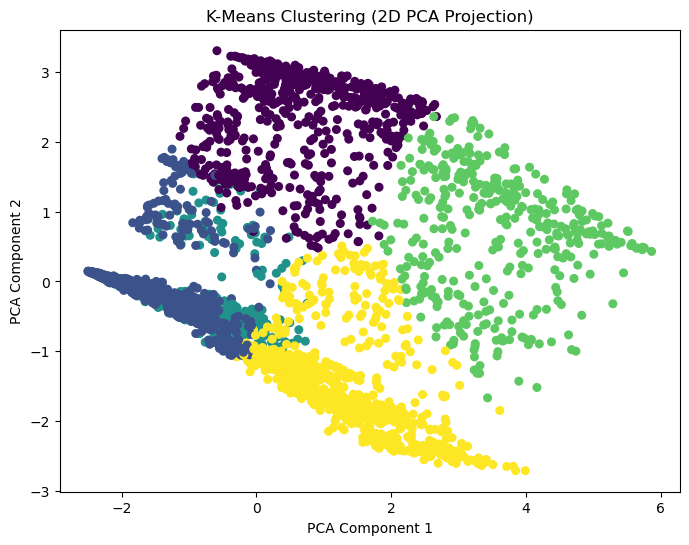

In [49]:
#K-MEANS CLUSTER VISUALIZATION
from sklearn.decomposition import PCA
# PCA for visualization
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(
    pca_components[:, 0],
    pca_components[:, 1],
    c=kmeans.labels_,      
    s=30
)

plt.title("K-Means Clustering (2D PCA Projection)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()



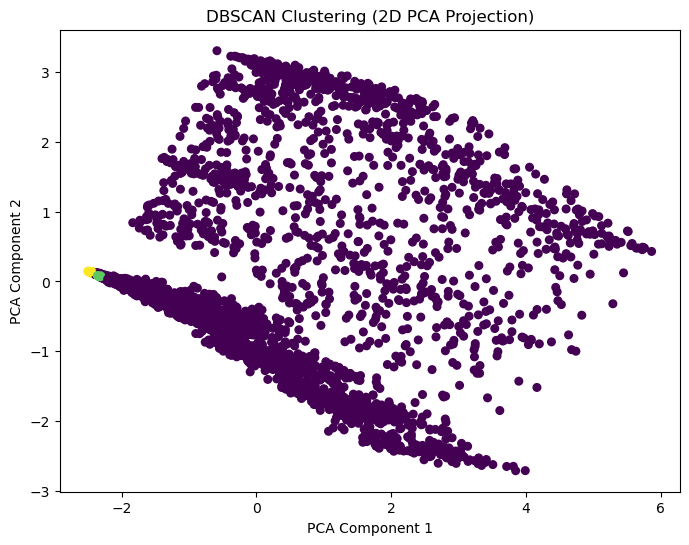

In [50]:
# DBSCAN CLUSTER VISUALIZATION

pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_scaled)
plt.figure(figsize=(8,6))
plt.scatter(
    pca_components[:, 0],
    pca_components[:, 1],
    c=best_labels,
    s=30
)

plt.title("DBSCAN Clustering (2D PCA Projection)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()


# Evaluation and Performance Metrics

1. K-Means Clustering Evaluation
- The silhouette score for K-Means was 0.34, which indicates weak to moderate clustering quality.
- The clusters were reasonably separated but still overlapping due to the dataset's high-dimensional nature.
- K-Means formed 5 clusters with fairly balanced cluster sizes.

2. DBSCAN Clustering Evaluation
- The best DBSCAN parameters found were:
eps = 0.1, min_samples = 15
- Final silhouette score (excluding noise): 0.6848, indicating good clustering quality.
- However, DBSCAN labeled ~97% of data points as noise, forming only 4 small clusters.
- This suggests DBSCAN could not capture meaningful structure in the dataset due to high density requirements.